## **Analysis of Startups Around the World**

---


Spring 2024 Data Science Project
Emmanuel Kebede




---

Member 1: Emmanuel Kebede, Contribution 100%

**Introduction**

The goal of this project is to analyze and gain a deeper look into the mysterious world of startups. Many students, especially Millenials and Gen Z students grew up hearing about and witnessing the creation of the largest and most dominent compnaies in history. Some examples of such companies are,

*   Facebook - 2004
*   Twitter - 2006
*   Uber - 2009
*   Open AI - 2015

Though Uber and Open AI started with the backing of inverstors and Venture Capital, Facebook and Twitter were for the most part bootstrapped until they reached a point where they proved their idea and were able to raise money. And there are many more examples of startup unicorns with humble beginnings. Unicorn is a definition for a company that is valued at over a billion dollars without being acquired, publicly listed, and is relatively new.

As interesting as the Startup world is, it is also a very strange and sophisticated environment. There are no written rules but the rules are yet some how clear. Though the playing fields are leveled, there are clear big players with power. And most importantly, luck, accompanied with grit seems to be the main requirment for making it in the Start Up world. I want to use some of what I learned through out this semester to try and  demystify the Start Up atmosphere. I will do this by answering some common questions that I have from previous research and also use some machine learning model to see how much support a company that I have in mind would be able to get.


Over this tutorial we will be going through

* Introduction
*   Data Curation
  - Where I got the data that I am going to use to answer the questions that I have
*   Exploratory Data Analysis
  - Dive deeper into the information the data set provides
*   Machine Learning Analysis
 - Find out if we could possible get funding for a startup based on provided parameters
*   Conclusions





**Data Curation**

Choosing a dataset was a long and hectic process. There were many issues I encountered in this journey. The first main issue is how secretive many companies are about the investments they are recieving. This is good for business but not good for me. Secondly, the issue was findind a dataset with recent information. The ones with large data were mostly of much older companies and due to the fast changing nature of the industry, they wouldn't really be helpful for what we are trying to accomplish. Nonetheless, after a long time of searching, I was able to find a Dataset that was compiled by Justinas Cirtautas on Kaggle: https://www.kaggle.com/datasets/justinas/startup-investments

The dataset is pretty large, boasting about 11 CSV files and 154 columns all together. The different CSV contain information about
- Acquisitions
- Degrees
- Funding Rounds
- Funds
- Investments
- IPOs
- Milestones
- Objects
- Offices
- Poeple
- Relationships

The main questions we are asking in this projects are


*   Is there a correlation between Degrees and Founders?
*   Does where you based affect how much money a startup is able to raise?
*   Lastly, we will add on to the previous question and ask if the funding stage affects the amount a startup is able to raise.

To answer these questions, we will mainly be use the following CSV files

* People
* Degree
* Relationships
* Offices
* Funding Rounds
* Total Funding



**Exploratory Data Analysis**

The first step is reading in the file and converting them into dataframes.

We will start with People and Degree.

In [49]:
import pandas as pd

people_df = pd.read_csv("/content/drive/MyDrive/320/project_data/people.csv")
degree_df = pd.read_csv("/content/drive/MyDrive/320/project_data/degrees.csv")

Lets get some more information about the dataframe.

In [50]:
# row and col count of degree_df
print(degree_df.count())
print(len(degree_df.columns))

id              109610
object_id       109610
degree_type      98389
subject          81298
institution     109555
graduated_at     58054
created_at      109610
updated_at      109610
dtype: int64
8


In [51]:
# column names of degree_df
print(degree_df.columns)

Index(['id', 'object_id', 'degree_type', 'subject', 'institution',
       'graduated_at', 'created_at', 'updated_at'],
      dtype='object')


In [52]:
# row and col count of people_df
print(people_df.count())
print(len(people_df.columns))

id                  226709
object_id           226709
first_name          226700
last_name           226705
birthplace           28084
affiliation_name    226684
dtype: int64
6


In [53]:
# column names of people_df
print(people_df.columns)

Index(['id', 'object_id', 'first_name', 'last_name', 'birthplace',
       'affiliation_name'],
      dtype='object')


Because we are going to use these dataframes to answer the first question listed. we would merge them based on their object_id

In [54]:
# Now we merge the DataFrames on 'object_id'
merged_people_degree_df = pd.merge(people_df, degree_df, on='object_id', how='inner')

merged_people_degree_df.head()

,id_x,object_id,first_name,last_name,birthplace,affiliation_name,id_y,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48
1,1,p:2,Ben,Elowitz,NaN,Blue Nile,700,BS,Applied Mathematics,"University of California, Berkeley",1994-01-01,2008-05-06 00:06:10,2008-05-06 00:06:10
2,2,p:3,Kevin,Flaherty,NaN,Wetpaint,706,BBA,NaN,Washington University in St Louis,NaN,2008-05-07 19:40:58,2013-11-21 09:43:38
3,2,p:3,Kevin,Flaherty,NaN,Wetpaint,707,MBA,NaN,Indiana University,NaN,2008-05-07 19:41:24,2013-11-21 09:43:38
4,4,p:5,Ian,Wenig,NaN,Zoho,47870,Degree,Advanced Business Professional Course,The Aji Network,2005-01-01,2013-06-29 13:33:08,2013-06-29 13:33:08


Before we continue, lets do the same for the other files and also show what question they will be associated with.

So to answer the question "Does where you based affect how much money a startup is able to raise?" We will use the Offices dataset. This dataset had the specific address, along with the latitude and longitude of where the company is based out of.

In [55]:
offices_df = pd.read_csv("/content/drive/MyDrive/320/project_data/offices.csv")
offices_df.head()

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN


In [56]:
print(offices_df.count())
print(len(offices_df.columns))


id              112718
object_id       112718
office_id       112718
description      68530
region          112718
address1         94430
address2         44520
city            107550
zip_code         93230
state_code       62017
country_code    112718
latitude        112718
longitude       112718
created_at           0
updated_at           0
dtype: int64
15


In [57]:
print(offices_df.columns)

Index(['id', 'object_id', 'office_id', 'description', 'region', 'address1',
       'address2', 'city', 'zip_code', 'state_code', 'country_code',
       'latitude', 'longitude', 'created_at', 'updated_at'],
      dtype='object')


We will do the same with funding rounds and relationships.

In [58]:
# We now read in funding_rounds.csv and calculate the total funding per object_id

funding_rounds_df = pd.read_csv("/content/drive/MyDrive/320/project_data/funding_rounds.csv")

total_funding_df = funding_rounds_df.groupby('object_id')['raised_amount'].sum().reset_index()

total_funding_df.head()

,object_id,raised_amount
0,c:1,39750000.0
1,c:1001,5000000.0
2,c:10014,0.0
3,c:10015,68069200.0
4,c:100155,10125293.0


In [59]:
relationships_df = pd.read_csv('/content/drive/MyDrive/320/project_data/relationships.csv')

relationships_df.head(5)

,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41


The great thing about this Dataset is how cleaned up the data already is for the most part. The person who managed the dataset did a great job with that. With that being said, we might encounter some information that we need to clean and and we will do so as we go.

So let get into answering the questions listed above.
Lets start with: **Is there a correlation between Degrees and Founders?**

As we have showen earlier, we are going to be using the degree and people dataframes.
We will begin by parsing datetime columns in the Degree dataframe.

In [60]:
degree_df['graduated_at'] = pd.to_datetime(degree_df['graduated_at'])
degree_df['created_at'] = pd.to_datetime(degree_df['created_at'])
degree_df['updated_at'] = pd.to_datetime(degree_df['updated_at'])

degree_df

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaT,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaT,2008-02-20 05:28:09,2008-02-20 05:28:09
...,...,...,...,...,...,...,...,...
109605,109606,p:268589,CPA,NaN,American Institute of Certtified Public Accoun...,NaT,2013-12-12 14:28:58,2013-12-12 14:28:58
109606,109607,p:268527,MS & BS,Engineering,South China University of Technology,NaT,2013-12-12 14:31:21,2013-12-12 14:31:21
109607,109608,p:268527,PhD,Engineering,Clarkson University,NaT,2013-12-12 14:31:48,2013-12-12 14:31:48
109608,109609,p:268528,B.S.,Electrical Engineering,Colorado State University,NaT,2013-12-12 14:38:15,2013-12-12 14:38:15


We will follow up by checking the compeletness of critical fields.

In [61]:
completeness_summary = {
    "Degrees Missing Degree Type": degree_df['degree_type'].isnull().sum(),
    "Degrees Missing Subject": degree_df['subject'].isnull().sum(),
    "Degrees Missing Institution": degree_df['institution'].isnull().sum(),
}
completeness_summary

{'Degrees Missing Degree Type': 11221,
 'Degrees Missing Subject': 28312,
 'Degrees Missing Institution': 55}

Now we will remove the entries with missing datas and do another merge. Since we will still hav alot of entries, removing these shouldn't be an issue

In [62]:
cleaned_merged_people_degree_df = merged_people_degree_df.dropna(subset=['degree_type', 'subject', 'institution'])

cleaned_merged_people_degree_df

,id_x,object_id,first_name,last_name,birthplace,affiliation_name,id_y,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48
1,1,p:2,Ben,Elowitz,NaN,Blue Nile,700,BS,Applied Mathematics,"University of California, Berkeley",1994-01-01,2008-05-06 00:06:10,2008-05-06 00:06:10
4,4,p:5,Ian,Wenig,NaN,Zoho,47870,Degree,Advanced Business Professional Course,The Aji Network,2005-01-01,2013-06-29 13:33:08,2013-06-29 13:33:08
5,4,p:5,Ian,Wenig,NaN,Zoho,47871,BS,"Biology, Psychology",McGill University,1986-01-01,2013-06-29 13:33:27,2013-06-29 13:33:27
9,7,p:8,Owen,Byrne,NaN,Digg,1027,BS,Computer Science,Saint Mary's (Canada),1986-01-01,2008-06-17 22:52:19,2008-06-18 06:54:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109048,226651,p:268524,James,Trueman,NaN,Unaffiliated,109604,Masters,Business Administration,"Wharton School of Business , University of Pen...",NaN,2013-12-12 14:22:33,2013-12-12 14:22:33
109049,226654,p:268527,Harry,Wei,NaN,Unaffiliated,109607,MS & BS,Engineering,South China University of Technology,NaN,2013-12-12 14:31:21,2013-12-12 14:31:21
109050,226654,p:268527,Harry,Wei,NaN,Unaffiliated,109608,PhD,Engineering,Clarkson University,NaN,2013-12-12 14:31:48,2013-12-12 14:31:48
109051,226655,p:268528,Edward,J. Treska,NaN,Unaffiliated,109609,B.S.,Electrical Engineering,Colorado State University,NaN,2013-12-12 14:38:15,2013-12-12 14:38:15


The next step is to answer the question by performing hypothesis tests. For our hypothesis test we'll focus on testing whether people with advanced degrees (e.g., PhDs) are more likely to occupy leadership positions (e.g., CEO, Founder, etc.) in startups than those without advanced degrees.

The Hypothesis we are testing is the following

H0: People with advanced degrees (e.g PHD) hold a larger proportion of leadership roles compared to those without advanced degrees.

H1 People with advanced degrees do not hold a larger proportion of leadership roles compared to those without advanced degrees.

---





In [63]:
# Merge to add title information to the cleaned merged people and degrees DataFrame
final_df = pd.merge(cleaned_merged_people_degree_df, relationships_df[['person_object_id', 'title']], left_on='object_id', right_on='person_object_id', how='inner')

# Display the first few rows of the final DataFrame to verify the merge
final_df.head(10)


,id_x,object_id,first_name,last_name,birthplace,affiliation_name,id_y,degree_type,subject,institution,graduated_at,created_at,updated_at,person_object_id,title
0,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Co-Founder/CEO/Board of Directors
1,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Co-founder & VP
2,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Business Development
3,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Limited Partner
4,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Consultant
5,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Consultant
6,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Consultant
7,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Consultant
8,1,p:2,Ben,Elowitz,NaN,Blue Nile,700,BS,Applied Mathematics,"University of California, Berkeley",1994-01-01,2008-05-06 00:06:10,2008-05-06 00:06:10,p:2,Co-Founder/CEO/Board of Directors
9,1,p:2,Ben,Elowitz,NaN,Blue Nile,700,BS,Applied Mathematics,"University of California, Berkeley",1994-01-01,2008-05-06 00:06:10,2008-05-06 00:06:10,p:2,Co-founder & VP


In [64]:
# First, we need to classify each title into whether it represents a leadership role

# Keywords that indicate a leadership role
leadership_keywords = ['CEO', 'Co-Founder', "President"]

# Updated function to handle NaN values and non-string entries
def is_leader(title):
    # Ensure title is a string to avoid TypeError with NaN values
    title_str = str(title)
    # Check if any keyword is in the title string
    return any(keyword in title_str for keyword in leadership_keywords)

# Apply the updated function to classify each title
final_df['is_leader'] = final_df['title'].apply(lambda x: 1 if is_leader(x) else 0)

In [65]:
# Next, we classify degrees into advanced (e.g., PhD) and not advanced. Assuming "PhD" explicitly marks advanced degrees:
final_df['has_advanced_degree'] = final_df['degree_type'].apply(lambda x: 1 if x == 'PhD' else 0)

final_df.head()

,id_x,object_id,first_name,last_name,birthplace,affiliation_name,id_y,degree_type,subject,institution,graduated_at,created_at,updated_at,person_object_id,title,is_leader,has_advanced_degree
0,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Co-Founder/CEO/Board of Directors,1,0
1,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Co-founder & VP,0,0
2,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Business Development,0,0
3,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Limited Partner,0,0
4,1,p:2,Ben,Elowitz,NaN,Blue Nile,699,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48,p:2,Consultant,0,0


**Now we conduct the Hypothesis Test**

We do this by using Chi-square test which can compare the proportions of individuals with advanced degrees in leadership roles against those without advanced degrees.

In [66]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(final_df['has_advanced_degree'], final_df['is_leader'])

# Performing the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [67]:
if p_value < 0.05:
    print(f"We reject the null hypothesis. (p-value = {p_value})")
    print("There is a significant difference in the proportion of leadership roles held by individuals with advanced degrees compared to those without.")
else:
    print(f"We fail to reject the null hypothesis. (p-value = {p_value})")
    print("There is no significant difference in the proportion of leadership roles held by individuals with advanced degrees compared to those without.")

We reject the null hypothesis. (p-value = 0.024380909462066707)
There is a significant difference in the proportion of leadership roles held by individuals with advanced degrees compared to those without.


As the result from our hypothesis tests shows, there is inded a significant difference in the proportion of leadership roles held by individuals with advanced degrees compared to those without. We can visulaize this better with a bar chart.

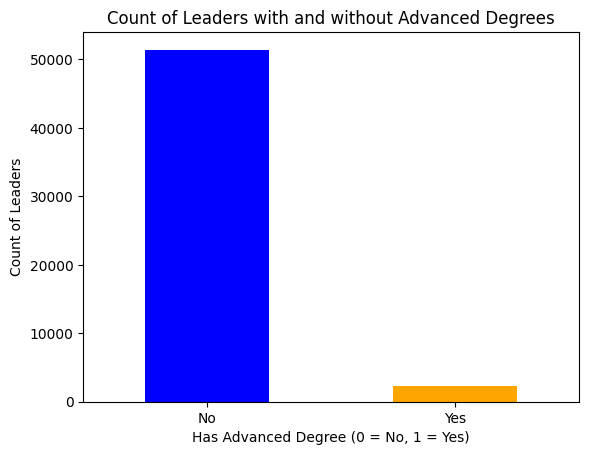

In [68]:
import matplotlib.pyplot as plt

leaders_count = final_df.groupby('has_advanced_degree')['is_leader'].sum()

leaders_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Leaders with and without Advanced Degrees')
plt.xlabel('Has Advanced Degree (0 = No, 1 = Yes)')
plt.ylabel('Count of Leaders')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()
plt.show()

The next question we want to ask is "Does where you based affect how much money a startup is able to raise?" There is a big hypothesis that startups in the west, specifically in California, are able to get much higher funding simply because of where they are located. This leads many to flood the streets of silicon valley in hopes of some billionaire throwing money at them for their app that puts a cat fitler on images. Anyways, we are going to use Mann-Whitney U Test to see if there is a correlation between the amount of money raised by startups in the west-coast versus everywhere else.

In [69]:
def is_west_coast(latitude, longitude):
    # Define latitude and longitude boundaries for the West Coast
    west_coast_lat_range = (32, 49)
    west_coast_lon_range = (-125, -114)

    return (west_coast_lat_range[0] <= latitude <= west_coast_lat_range[1] and
            west_coast_lon_range[0] <= longitude <= west_coast_lon_range[1])

offices_df['is_west_coast'] = offices_df.apply(lambda x: is_west_coast(x['latitude'], x['longitude']), axis=1)

offices_df.head()

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at,is_west_coast
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN,True
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN,True
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN,True
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN,True
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN,False


In [70]:
#  Now we merge the offices dataframe with the total funding dataframe
offices_funding_merged_df = pd.merge(offices_df, total_funding_df, on='object_id', how='inner')


offices_funding_merged_df.head()

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at,is_west_coast,raised_amount
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN,True,3.975000e+07
1,78625,c:1,91294,NaN,New York,270 Lafayette Street,Suite 505,New York,10012,NY,USA,40.723731,-73.996431,NaN,NaN,False,3.975000e+07
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN,True,4.500000e+07
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN,True,2.425700e+09
4,6975,c:5,8377,Europe HQ,Dublin,NaN,NaN,Dublin,NaN,NaN,IRL,53.344104,-6.267494,NaN,NaN,False,2.425700e+09


In [71]:
# And we finally are able to perform Mann-Whitney U Test

from scipy.stats import mannwhitneyu

# Separate the funding amounts based on West Coast classification
west_coast_funding = offices_funding_merged_df[offices_funding_merged_df['is_west_coast'] == True]['raised_amount']
not_west_coast_funding = offices_funding_merged_df[offices_funding_merged_df['is_west_coast'] == False]['raised_amount']

# Perform the Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(west_coast_funding, not_west_coast_funding, alternative='two-sided')

# Interpret the results
if p_value < 0.05:
    print(f"There is a statistically significant difference in funding between West Coast and non-West Coast startups (p-value = {p_value}).")
else:
    print(f"There is no statistically significant difference in funding between West Coast and non-West Coast startups (p-value = {p_value}).")


There is a statistically significant difference in funding between West Coast and non-West Coast startups (p-value = 1.0636158583270004e-96).


The test results show that there is a statistically significant difference in funding that is provided between West Coast and non-West Coast startups. So lets visualize this with box-and-whisker plot

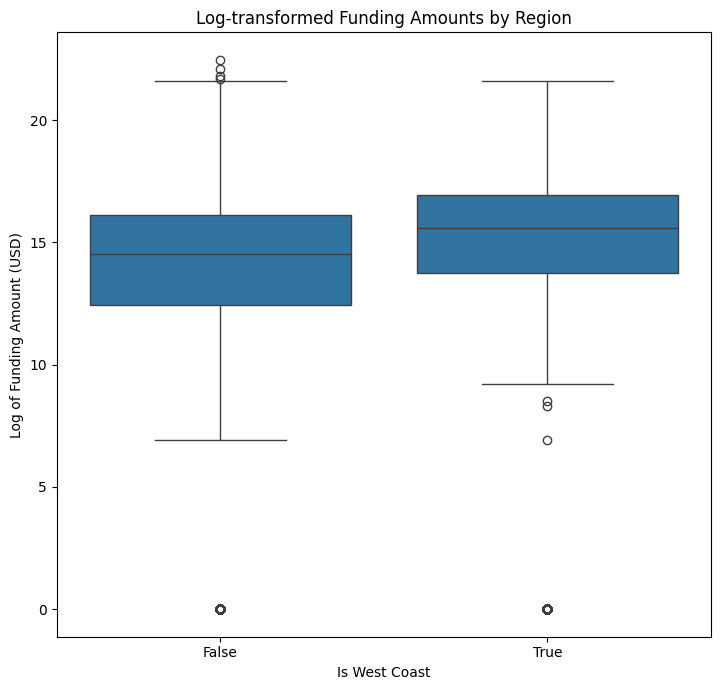

In [72]:
import seaborn as sns
import numpy as np

# Log transformation of the 'raised_amount' to minimize the impact of outliers
offices_funding_merged_df['log_raised_amount'] = np.log1p(offices_funding_merged_df['raised_amount'])

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='is_west_coast', y='log_raised_amount', data=offices_funding_merged_df)
plt.title('Log-transformed Funding Amounts by Region')
plt.xlabel('Is West Coast')
plt.ylabel('Log of Funding Amount (USD)')



plt.tight_layout()
plt.show()

What we did here was essentially categorize the companies based on whether they were in the West Coast or not in the West Coast. Then we checked how much funding they got.

As you can see from the box-and-whisker plot, startups in the west-coast were able to raise more money than startups that were not in the west coast. However, there are a lot of outliers in non-west coast startups that recieved higher funding. We also had to apply a log transformation to the funding amount to get an accurate plot.

Lastly we check to see if there is any correlation between the funding stage and the amount raised, while also considering the geographic location (West Coast vs. Non-West Coast). We do this by using a linear regression.


In [73]:
merged_data = pd.merge(offices_funding_merged_df, funding_rounds_df[['object_id', 'funding_round_code']], on='object_id', how='inner')

# we convert the categorical funding_round_code into a format meant for
# suitable for analysis and we do this using one-hot encoding.

numerical_converstion = pd.get_dummies(merged_data, columns=['funding_round_code'], drop_first=True)

numerical_converstion.head(5)

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,...,funding_round_code_f,funding_round_code_g,funding_round_code_grant,funding_round_code_partial,funding_round_code_post_ipo_debt,funding_round_code_post_ipo_equity,funding_round_code_private_equity,funding_round_code_secondary_market,funding_round_code_seed,funding_round_code_unattributed
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,...,False,False,False,False,False,False,False,False,False,False
1,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,...,False,False,False,False,False,False,False,False,False,False
2,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,...,False,False,False,False,False,False,False,False,False,False
3,78625,c:1,91294,NaN,New York,270 Lafayette Street,Suite 505,New York,10012,NY,...,False,False,False,False,False,False,False,False,False,False
4,78625,c:1,91294,NaN,New York,270 Lafayette Street,Suite 505,New York,10012,NY,...,False,False,False,False,False,False,False,False,False,False


In [74]:
print(funding_rounds_df['funding_round_code'].value_counts())

funding_round_code
unattributed        12227
seed                11608
a                    7999
b                    4892
debt_round           3409
angel                3239
partial              3115
c                    2499
d                    1129
private_equity       1043
grant                 776
e                     430
convertible           187
f                     145
crowd                 111
post_ipo_equity        80
secondary_market       16
g                      13
post_ipo_debt           7
crowd_equity            3
Name: count, dtype: int64


In [75]:
# Check if any row has a non-zero value in one-hot encoded columns
encoded_columns = [col for col in numerical_converstion.columns if 'funding_round_code_' in col]
print(numerical_converstion[encoded_columns].sum())

funding_round_code_angel                3756
funding_round_code_b                    6122
funding_round_code_c                    3292
funding_round_code_convertible           209
funding_round_code_crowd                 105
funding_round_code_crowd_equity            3
funding_round_code_d                    1511
funding_round_code_debt_round           3838
funding_round_code_e                     625
funding_round_code_f                     213
funding_round_code_g                      19
funding_round_code_grant                 856
funding_round_code_partial              3256
funding_round_code_post_ipo_debt           6
funding_round_code_post_ipo_equity       108
funding_round_code_private_equity       1238
funding_round_code_secondary_market       33
funding_round_code_seed                12202
funding_round_code_unattributed        13813
dtype: int64


In [76]:
# Then we can perform the regression analysis and like last time we will apply
import statsmodels.api as sm
import numpy as np


merged_data['is_west_coast'] = merged_data['is_west_coast'].astype(int)


X = merged_data.drop(['id', 'object_id', 'office_id', 'raised_amount'], axis=1)
X = X.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
X = sm.add_constant(X)

y = pd.to_numeric(merged_data['raised_amount'], errors='coerce').fillna(0)

# Perform the regression
model = sm.OLS(y, X).fit()

# Print the summary results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          raised_amount   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     515.0
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        02:22:27   Log-Likelihood:            -1.2132e+06
No. Observations:               60902   AIC:                         2.426e+06
Df Residuals:                   60892   BIC:                         2.427e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.675e+07   1.53

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


I will briefly explain what the result tells us about our hypothesis.

The positive and significant coefficient for is_west_coast suggests that, holding other factors constant, being on the West Coast is associated with an increase in the amount of funding raised. This supports a conclusion that location is a significant factor in funding outcomes for startups.

while the analysis supports a conclusion about the significance of the West Coast in affecting funding outcomes, caution is advised in interpretation. It's important to consider the broader context, potential confounding factors, and the model's limitations. Further investigation could refine these conclusions and explore additional factors influencing startup funding.

The Scatter-Plot below might be able to give a better understanding of these findings.

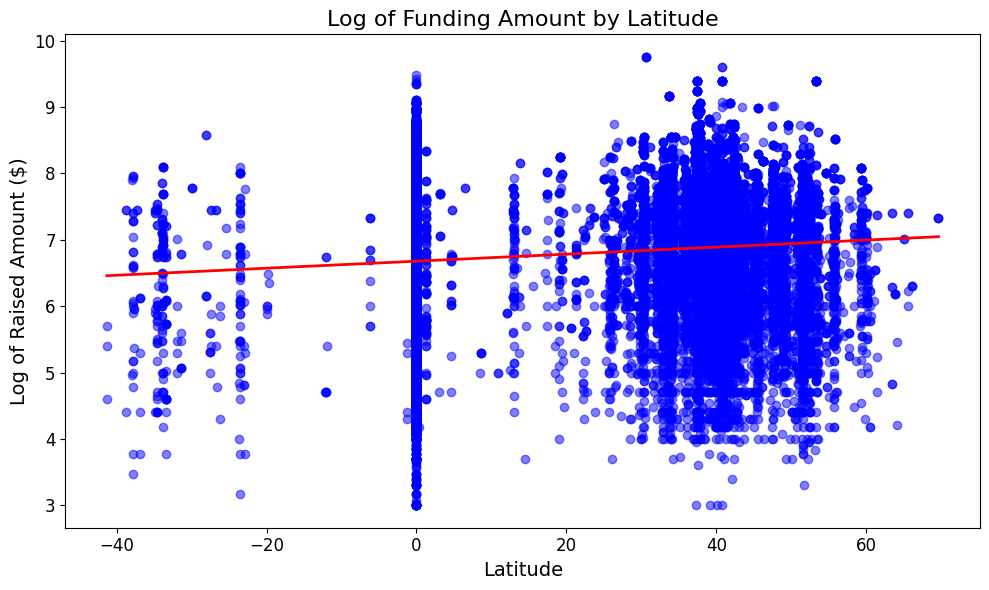

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
plot_data = merged_data.copy()
plot_data['raised_amount'] = plot_data['raised_amount'].replace(0, np.nan)
plot_data.dropna(subset=['raised_amount'], inplace=True)
plot_data['log_raised_amount'] = np.log10(plot_data['raised_amount'])
plt.figure(figsize=(10, 6))

# Plotting with log scale for y-axis
sns.regplot(x='latitude', y='log_raised_amount', data=plot_data,
            scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red', 'lw': 2},
            marker='o', ci=None)

plt.title('Log of Funding Amount by Latitude', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Log of Raised Amount ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


# Machine Learning Analysis
The next step is building a Machine learning model that can help us predict if we will be able to get funding for a hypothethical startup given the location and the founders education level. Just to make things simpler again we will resart everything again and do another walk through. The Machine Learning Model we will be using is a Linear Regression Model.

So we start by importing all the dfs

In [78]:
import pandas as pd

people_df = pd.read_csv("/content/drive/MyDrive/320/project_data/people.csv")
degrees_df = pd.read_csv("/content/drive/MyDrive/320/project_data/degrees.csv")
offices_df = pd.read_csv("/content/drive/MyDrive/320/project_data/offices.csv")
funding_rounds_df = pd.read_csv("/content/drive/MyDrive/320/project_data/funding_rounds.csv")
relationships_df = pd.read_csv("/content/drive/MyDrive/320/project_data/relationships.csv")

In [79]:
# Then we have to do some clean up. Specifically to the parameters that are essential
people_df.isnull().sum()

id                       0
object_id                0
first_name               9
last_name                4
birthplace          198625
affiliation_name        25
dtype: int64

In [80]:
# Filling missing 'birthplace', 'affiliation_name', 'first_name' and 'last_name' with 'Unknown'
people_df['first_name'].fillna('Unknown', inplace=True)
people_df['last_name'].fillna('Unknown', inplace=True)

people_df['birthplace'].fillna('Unknown', inplace=True)

people_df['affiliation_name'].fillna('Unknown', inplace=True)

In [81]:
# Checking for missing values in the offices dataset
offices_missing_values = offices_df.isnull().sum()
offices_invalid_coords = (offices_df[(offices_df['latitude'] < -90) | (offices_df['latitude'] > 90) |
                          (offices_df['longitude'] < -180) | (offices_df['longitude'] > 180)]).count()

print("Missing Values:\n", offices_missing_values)
print("\nInvalid Coordinates:\n", offices_invalid_coords)

Missing Values:
 id                   0
object_id            0
office_id            0
description      44188
region               0
address1         18288
address2         68198
city              5168
zip_code         19488
state_code       50701
country_code         0
latitude             0
longitude            0
created_at      112718
updated_at      112718
dtype: int64

Invalid Coordinates:
 id              0
object_id       0
office_id       0
description     0
region          0
address1        0
address2        0
city            0
zip_code        0
state_code      0
country_code    0
latitude        0
longitude       0
created_at      0
updated_at      0
dtype: int64


There are no missing values in the parameters we care about so we don't really have to worry about cleaning this up. We can move on the next step

In [82]:
# Keeping only relevant columns in the offices dataset
offices_df = offices_df[['object_id', 'latitude', 'longitude']]

In [83]:
# Checking for missing values in the funding rounds dataset
funding_rounds_missing_values = funding_rounds_df.isnull().sum()

In [84]:
# Creating a binary target variable based on whether funding was received
funding_rounds_df['funding_received'] = (funding_rounds_df['raised_amount_usd'] > 0).astype(int)

print("Missing Values:\n", funding_rounds_missing_values)
print("\nPreview of Funding Rounds with New Target Variable:\n", funding_rounds_df.head())

Missing Values:
 id                              0
funding_round_id                0
object_id                       0
funded_at                     248
funding_round_type              0
funding_round_code              0
raised_amount_usd               0
raised_amount                   0
raised_currency_code         3066
pre_money_valuation_usd         0
pre_money_valuation             0
pre_money_currency_code     26045
post_money_valuation_usd        0
post_money_valuation            0
post_money_currency_code    22480
participants                    0
is_first_round                  0
is_last_round                   0
source_url                  12546
source_description           9489
created_by                   4637
created_at                      0
updated_at                      0
dtype: int64

Preview of Funding Rounds with New Target Variable:
    id  funding_round_id object_id   funded_at funding_round_type  \
0   1                 1       c:4  2006-12-01           series-b  

In [85]:
# Perform the merge using a common key, applying suffixes to distinguish similar column names then merge the 'relationships' data
people_degrees = pd.merge(people_df, degrees_df, left_on='object_id', right_on='object_id', how='left', suffixes=('', '_deg'))

people_degrees_relationships = pd.merge(people_degrees, relationships_df, left_on='object_id', right_on='person_object_id', how='left')
print(people_degrees_relationships.head())

   id_x object_id first_name last_name birthplace affiliation_name  id_deg  \
0     1       p:2        Ben   Elowitz    Unknown        Blue Nile   699.0   
1     1       p:2        Ben   Elowitz    Unknown        Blue Nile   699.0   
2     1       p:2        Ben   Elowitz    Unknown        Blue Nile   699.0   
3     1       p:2        Ben   Elowitz    Unknown        Blue Nile   699.0   
4     1       p:2        Ben   Elowitz    Unknown        Blue Nile   699.0   

  degree_type                                  subject  \
0          BS  Electrical Engineering/Computer Science   
1          BS  Electrical Engineering/Computer Science   
2          BS  Electrical Engineering/Computer Science   
3          BS  Electrical Engineering/Computer Science   
4          BS  Electrical Engineering/Computer Science   

                          institution  ... relationship_id person_object_id  \
0  University of California, Berkeley  ...             1.0              p:2   
1  University of Califor

In [86]:
# Merge with 'offices' to add location data
full_data = pd.merge(people_degrees_relationships, offices_df, left_on='relationship_object_id', right_on='object_id', how='left', suffixes=('', '_off'))

print(full_data[['object_id', 'first_name', 'last_name', 'degree_type', 'subject', 'institution', 'title', 'latitude', 'longitude']].head())

  object_id first_name last_name degree_type  \
0       p:2        Ben   Elowitz          BS   
1       p:2        Ben   Elowitz          BS   
2       p:2        Ben   Elowitz          BS   
3       p:2        Ben   Elowitz          BS   
4       p:2        Ben   Elowitz          BS   

                                   subject  \
0  Electrical Engineering/Computer Science   
1  Electrical Engineering/Computer Science   
2  Electrical Engineering/Computer Science   
3  Electrical Engineering/Computer Science   
4  Electrical Engineering/Computer Science   

                          institution                              title  \
0  University of California, Berkeley  Co-Founder/CEO/Board of Directors   
1  University of California, Berkeley  Co-Founder/CEO/Board of Directors   
2  University of California, Berkeley                    Co-founder & VP   
3  University of California, Berkeley               Business Development   
4  University of California, Berkeley                 

In [87]:
# Ensure the 'funding_received' column is added correctly to the funding_rounds_df
funding_rounds_df['funding_received'] = (funding_rounds_df['raised_amount_usd'] > 0).astype(int)

complete_data = pd.merge(full_data, funding_rounds_df, left_on='relationship_object_id', right_on='object_id', how='left', suffixes=('', '_fr'))

# Check if the column exists now
print('Columns in complete_data:', complete_data.columns)

Columns in complete_data: Index(['id_x', 'object_id', 'first_name', 'last_name', 'birthplace',
       'affiliation_name', 'id_deg', 'degree_type', 'subject', 'institution',
       'graduated_at', 'created_at_x', 'updated_at_x', 'id_y',
       'relationship_id', 'person_object_id', 'relationship_object_id',
       'start_at', 'end_at', 'is_past', 'sequence', 'title', 'created_at_y',
       'updated_at_y', 'object_id_off', 'latitude', 'longitude', 'id',
       'funding_round_id', 'object_id_fr', 'funded_at', 'funding_round_type',
       'funding_round_code', 'raised_amount_usd', 'raised_amount',
       'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at', 'funding_received'],
      dtype='object')


It is important that 'funding receieved' column is in the data.

In [88]:
# Merge the current full data with 'funding_rounds' to add funding information

relevant_columns = ['object_id', 'first_name', 'last_name', 'degree_type', 'subject', 'institution', 'title', 'latitude', 'longitude', 'funding_received']
print(complete_data[relevant_columns].head())

  object_id first_name last_name degree_type  \
0       p:2        Ben   Elowitz          BS   
1       p:2        Ben   Elowitz          BS   
2       p:2        Ben   Elowitz          BS   
3       p:2        Ben   Elowitz          BS   
4       p:2        Ben   Elowitz          BS   

                                   subject  \
0  Electrical Engineering/Computer Science   
1  Electrical Engineering/Computer Science   
2  Electrical Engineering/Computer Science   
3  Electrical Engineering/Computer Science   
4  Electrical Engineering/Computer Science   

                          institution                              title  \
0  University of California, Berkeley  Co-Founder/CEO/Board of Directors   
1  University of California, Berkeley  Co-Founder/CEO/Board of Directors   
2  University of California, Berkeley  Co-Founder/CEO/Board of Directors   
3  University of California, Berkeley  Co-Founder/CEO/Board of Directors   
4  University of California, Berkeley  Co-Founder/CEO/

In [93]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import sparse

features = complete_data[relevant_columns]

# Normalize the numerical features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(features[['latitude', 'longitude']])

# Convert numerical features to a sparse matrix
sparse_numerical_features = sparse.csr_matrix(numerical_features)

# Use OneHotEncoder with sparse_output=True (default setting)
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features[['degree_type']])

# Combine sparse encoded features with sparse numerical features
features_encoded = sparse.hstack([encoded_features, sparse_numerical_features])

target = features['funding_received']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)



In [94]:
import numpy as np
# Set up the imputer and logistic regression within a pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix


# Ensure y_train and y_test are numpy arrays for consistent indexing
if isinstance(y_train, pd.Series):
    y_train = y_train.values
if isinstance(y_test, pd.Series):
    y_test = y_test.values

# Identify indices where there are no NaN values in y_train and y_test
non_nan_indices_train = np.where(~np.isnan(y_train))[0]
non_nan_indices_test = np.where(~np.isnan(y_test))[0]

# Filter both X_train and X_test, as well as y_train and y_test using the identified indices
X_train_filtered = X_train[non_nan_indices_train]
y_train_filtered = y_train[non_nan_indices_train]
X_test_filtered = X_test[non_nan_indices_test]
y_test_filtered = y_test[non_nan_indices_test]



imputer = SimpleImputer(strategy='median', missing_values=np.nan)
model = LogisticRegression(max_iter=1000)
pipeline = make_pipeline(imputer, model)

# Train the model using the pipeline on the filtered training data
pipeline.fit(X_train_filtered, y_train_filtered)

# Predict and evaluate the model on the filtered test data
y_pred = pipeline.predict(X_test_filtered)
print("Classification Report:")
print(classification_report(y_test_filtered, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_filtered, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.00      0.01      9373
         1.0       0.94      1.00      0.97    159969

    accuracy                           0.94    169342
   macro avg       0.91      0.50      0.49    169342
weighted avg       0.94      0.94      0.92    169342

Confusion Matrix:
[[    44   9329]
 [     6 159963]]


The report shows a High Overall Accuracy with a score of 94% while also showing a very low recall with practically 0.0. So we adjust the model to account for class weight.

In [95]:
# Adjusting the model to account for class imbalance
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Creating a pipeline
pipeline = make_pipeline(SimpleImputer(strategy='median'), model)

# Retrain the model
pipeline.fit(X_train_filtered, y_train_filtered)

# Re-evaluate the model
y_pred = pipeline.predict(X_test_filtered)
print("Updated Classification Report:")
print(classification_report(y_test_filtered, y_pred))
print("Updated Confusion Matrix:")
print(confusion_matrix(y_test_filtered, y_pred))

Updated Classification Report:
              precision    recall  f1-score   support

         0.0       0.08      0.51      0.14      9373
         1.0       0.96      0.65      0.78    159969

    accuracy                           0.65    169342
   macro avg       0.52      0.58      0.46    169342
weighted avg       0.91      0.65      0.74    169342

Updated Confusion Matrix:
[[  4809   4564]
 [ 55251 104718]]


This new refinment has improved recall and though it has decreased precision  and reduced performance on Class 1.0, it is now giving a more accurate predictions.

# Insights and Conclusions
I hope this tutorial has given you a better insight into the startup world. We have shown that having a specifc level of college degree doesn't really influence how much funding your startup is bound to get. Also how location (whether you're in the West Coast or East Coast) affects the funding you might get. Along with developing how succesful of funding a startup might be able to get based on the education level of the founder and the location that the startup is based it.


---



Thank you
Emmanuel Kebede (117222579) I did this project by myself so I did everything